In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [42]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, 
                         vmin= -1, vmax=1,
                         cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [29]:
merged = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/MERGE_FT_TEP_UT_on_ID.csv'),
                    index_col=0)

In [30]:
merged

,KJIC,MS_Avg,MS_neg_error,MS_pos_error,TEP_average,TEP_error,Beta_avg,PC_IF_2.25MHz,SE_IF_2.25MHz,SE_%_IF_2.25MHz,PC_IF_3.5MHz,SE_IF_3.5MHz,SE_%_IF_3.5MHz,PC_BS
ID,,,,,,,,,,,,,,
304-0-1,147.2,NaN,NaN,NaN,NaN,NaN,0.002743,0.0,0.013,2.9,0.0,0.005,1.3,0.0
304-0-2,153.6,0.12,0.035,0.086,-1.547,0.049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304-0-3,148.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304-0-4,181.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304-0-5,179.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A286-80-1,51.0,NaN,NaN,NaN,NaN,NaN,0.002187,501.0,0.025,2.0,759.0,0.022,1.5,-64.0
A286-80-2,50.5,0.01,0.002,0.002,-1.466,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A286-80-3,53.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plotting

group data by type of sample and cold work

In [31]:
merged.index = merged.index.str.rstrip('-12345')

In [32]:
mean_df = merged.groupby('ID').mean()

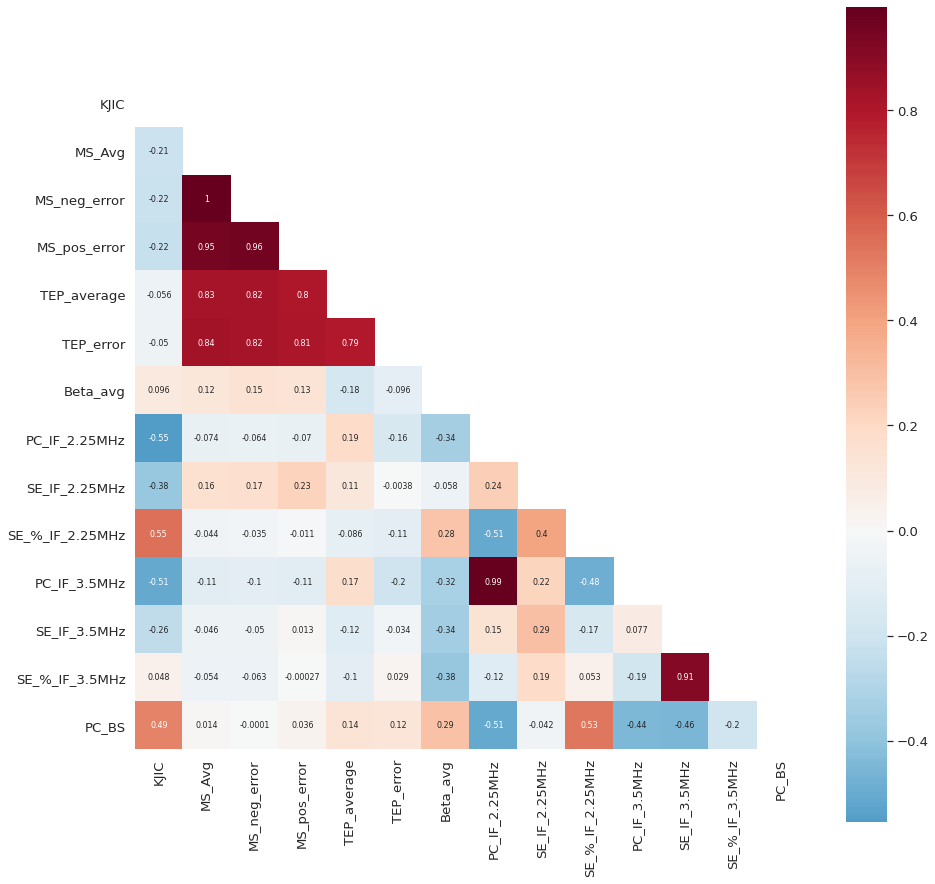

In [33]:
plot_corr(mean_df)

### Use only mean

In [34]:
short_mean = mean_df.loc[:, ['KJIC', 'MS_Avg', 'TEP_average',
        'Beta_avg', 'PC_IF_2.25MHz', 'PC_IF_3.5MHz',
       'PC_BS']]
short_mean['Type'] = short_mean.index.str.split('-').str[0]
short_mean.describe()

,KJIC,MS_Avg,TEP_average,Beta_avg,PC_IF_2.25MHz,PC_IF_3.5MHz,PC_BS
count,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,96.482982,0.933500,-1.352450,0.002363,179.250000,271.550000,-22.100000
std,43.537916,1.688496,0.222509,0.000265,196.997429,339.762374,26.263643
min,47.166667,0.009000,-1.673750,0.001770,0.000000,0.000000,-69.000000
25%,69.480000,0.019000,-1.516250,0.002224,48.000000,53.500000,-39.250000
50%,77.800000,0.084625,-1.346000,0.002392,105.500000,144.000000,-22.500000
75%,108.510000,1.096125,-1.248000,0.002554,206.000000,263.000000,0.000000
max,198.500000,6.391000,-0.822000,0.002785,601.000000,1136.000000,30.000000


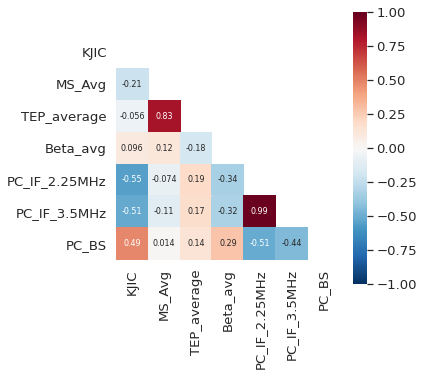

In [43]:
plot_corr(short_mean, figsize=(5,5))

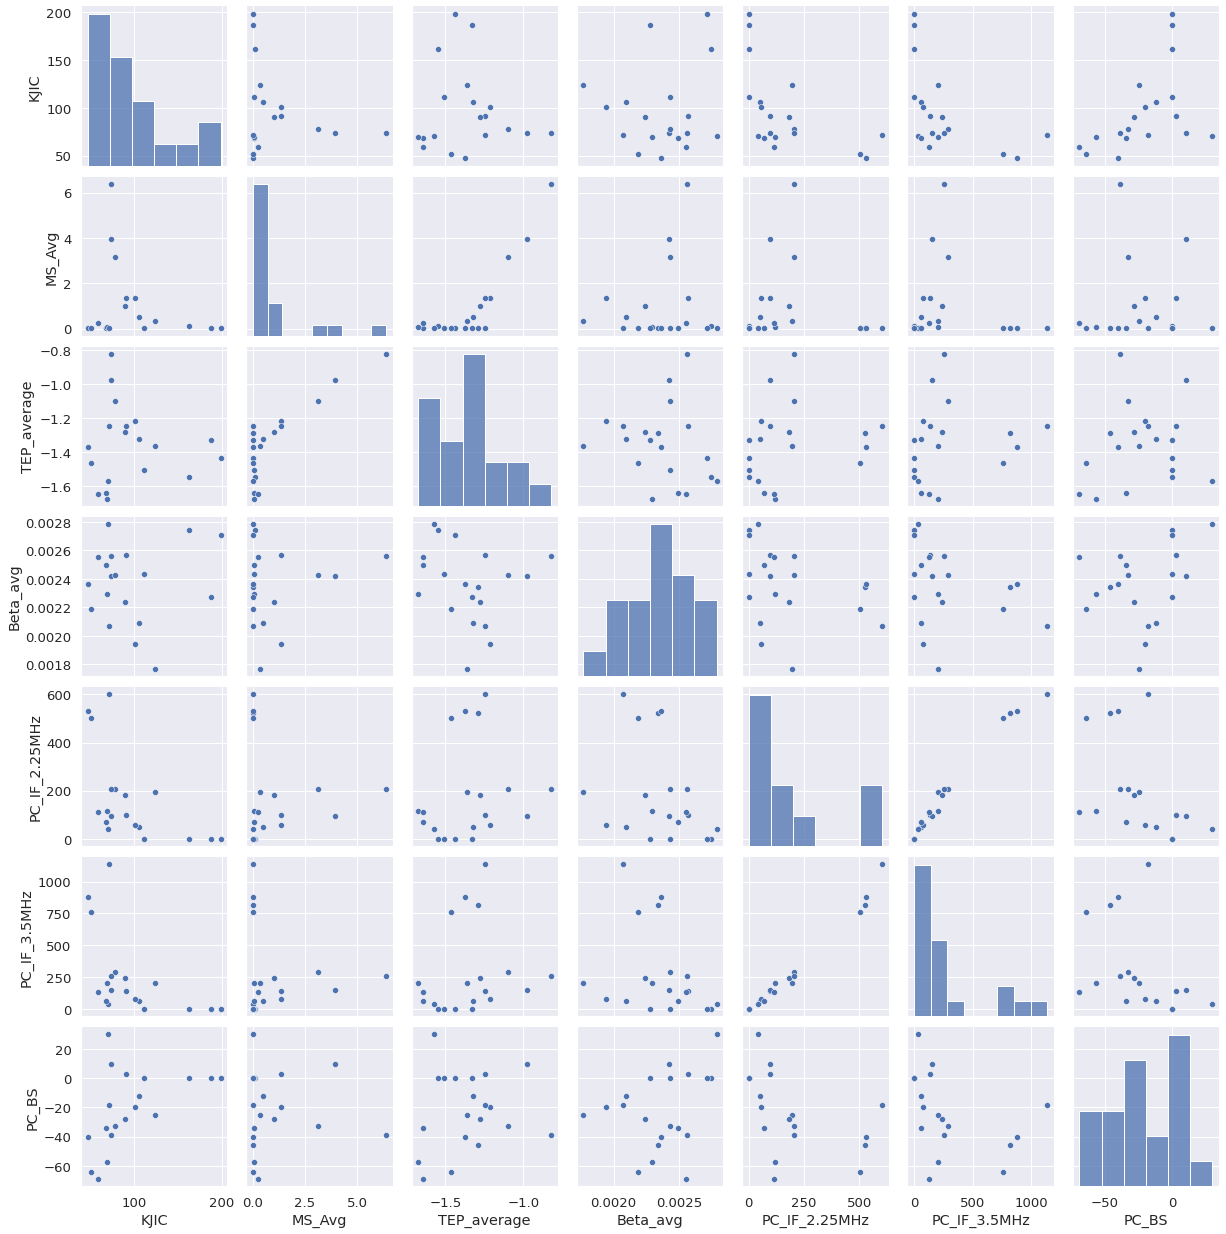

In [41]:
sns.pairplot(short_mean)

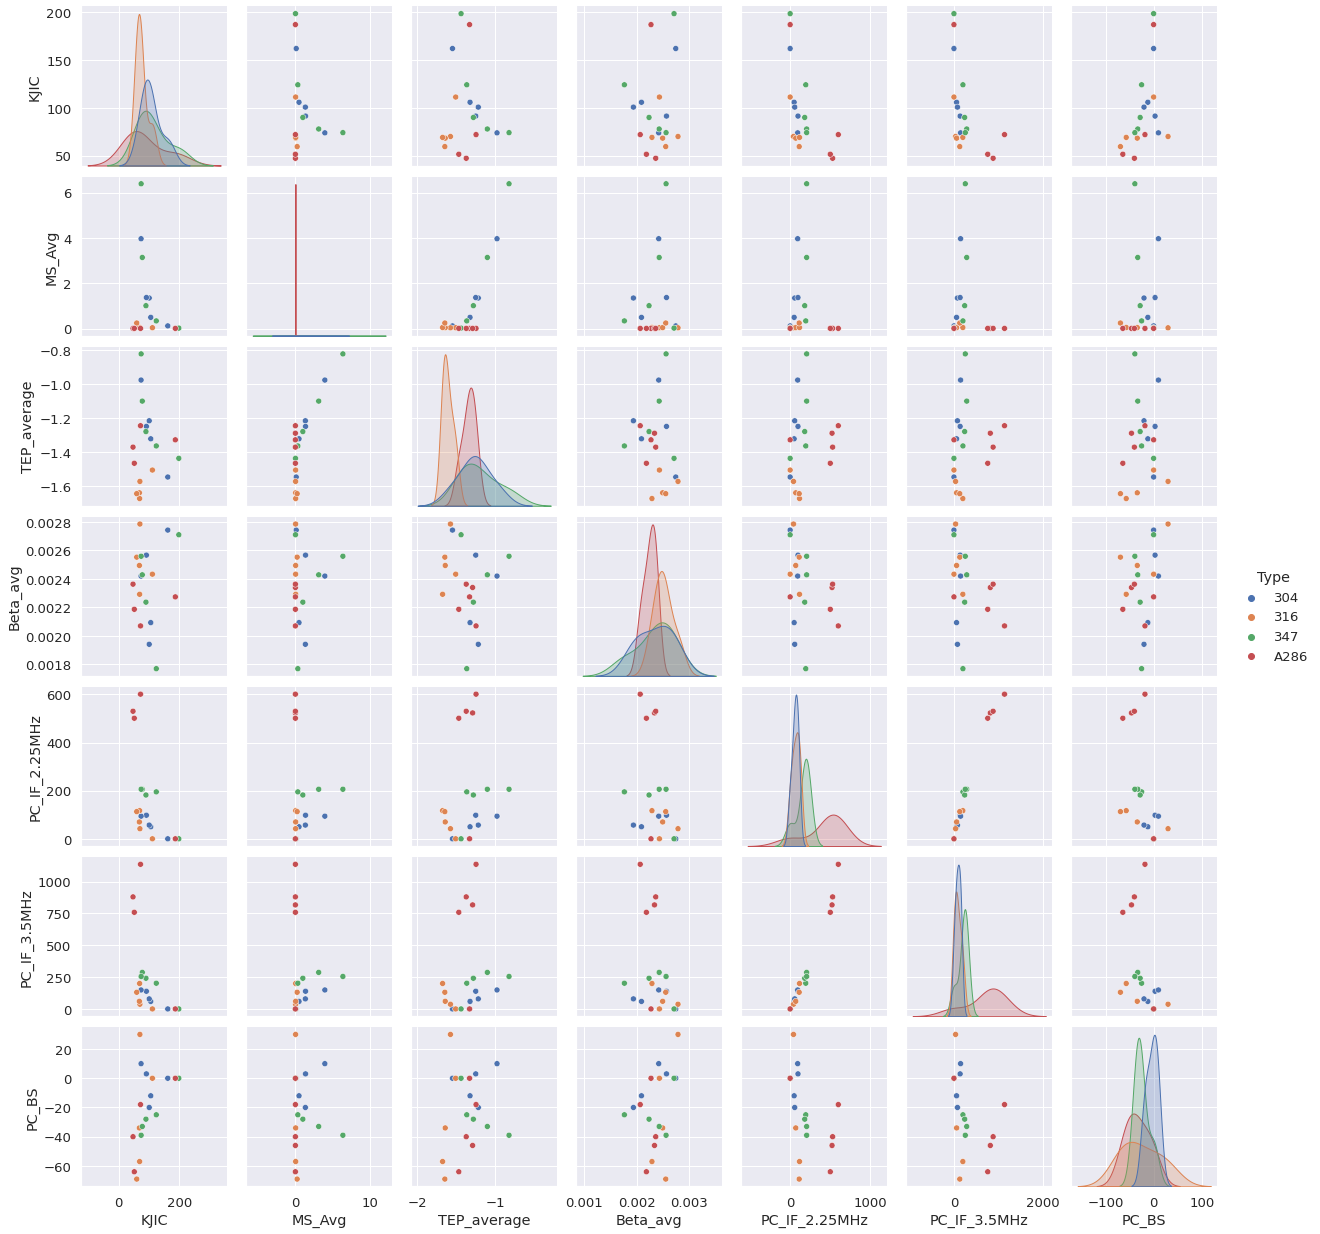

In [36]:
sns.pairplot(short_mean, hue='Type')

In [37]:
short_mean.head()

,KJIC,MS_Avg,TEP_average,Beta_avg,PC_IF_2.25MHz,PC_IF_3.5MHz,PC_BS,Type
ID,,,,,,,,
304-0,162.000,0.120,-1.547,0.002743,0.0,0.0,0.0,304
304-20,105.780,0.496,-1.322,0.002093,50.0,59.0,-12.0,304
304-40,100.700,1.350,-1.216,0.001941,57.0,79.0,-20.0,304
304-60,91.320,1.371,-1.249,0.002567,98.0,139.0,3.0,304
304-80,73.775,3.966,-0.976,0.002420,94.0,149.0,10.0,304


In [38]:
test = pd.melt(short_mean, id_vars=['KJIC', 'Type'], value_vars=['MS_Avg', 'TEP_average', 'Beta_avg', 'PC_IF_2.25MHz', 'PC_IF_3.5MHz', 'PC_BS'] )

In [39]:
test

,KJIC,Type,variable,value
0,162.000000,304,MS_Avg,0.120
1,105.780000,304,MS_Avg,0.496
2,100.700000,304,MS_Avg,1.350
3,91.320000,304,MS_Avg,1.371
4,73.775000,304,MS_Avg,3.966
...,...,...,...,...
115,187.025000,A286,PC_BS,0.000
116,71.950000,A286,PC_BS,-18.000
117,NaN,A286,PC_BS,-46.000
118,47.166667,A286,PC_BS,-40.000


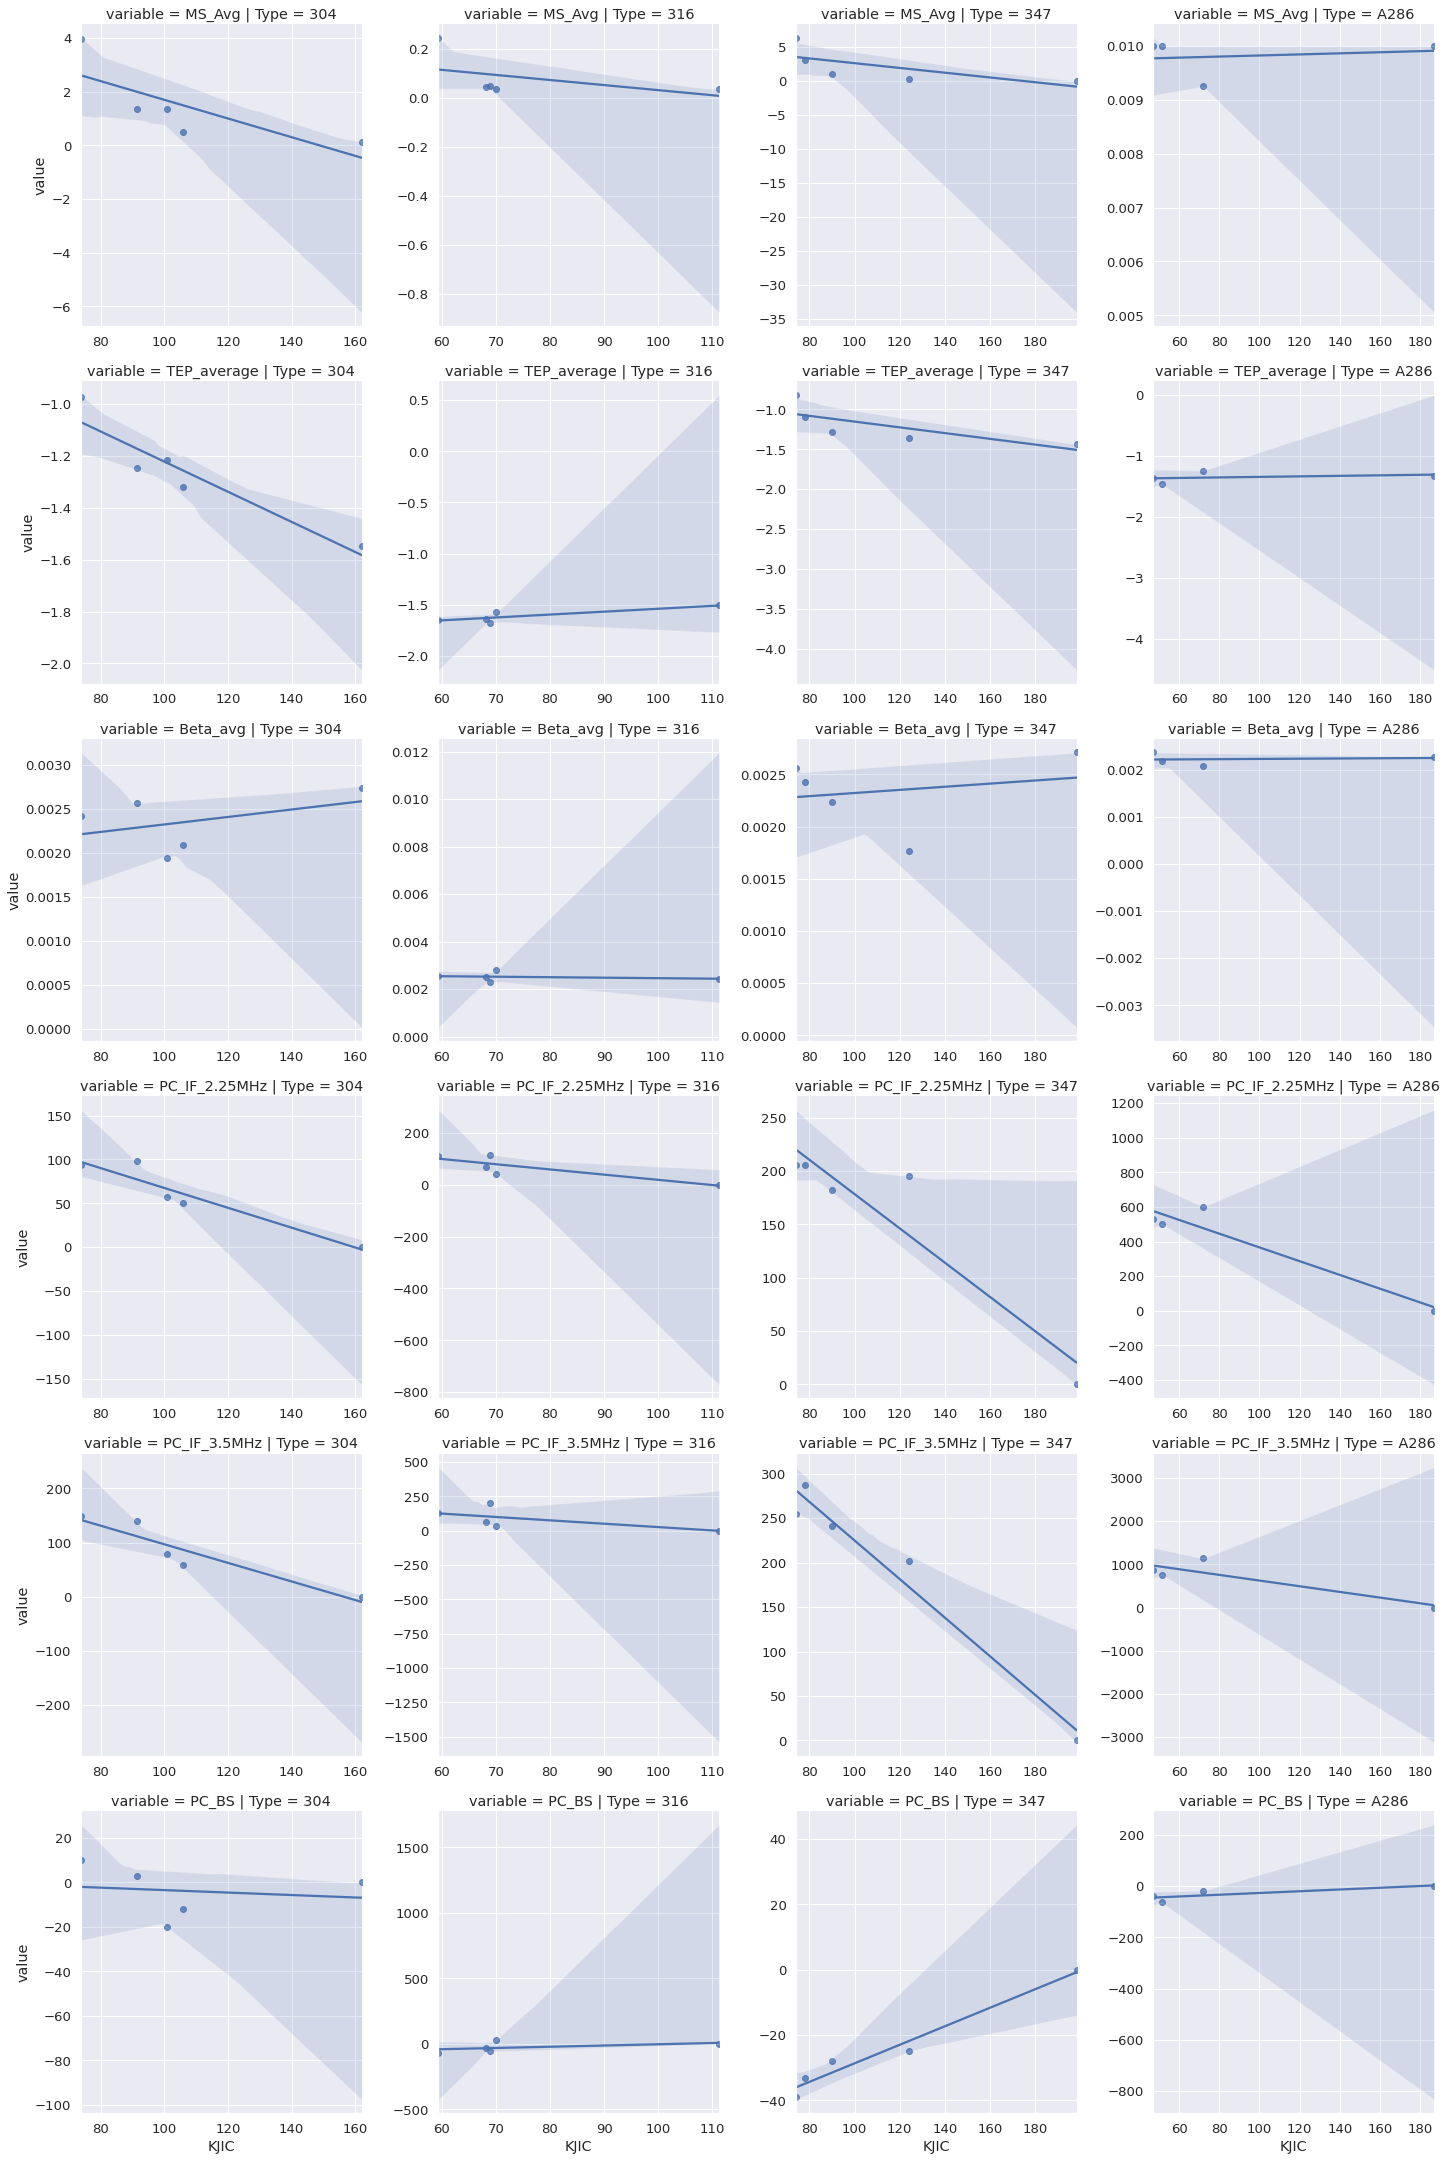

In [40]:
sns.lmplot(x='KJIC', y='value', data=test, col='Type', row='variable', sharey=False, sharex=False)